<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

* Notebook completed by Adam Lang as a fundamentals review of PyTorch from the great Daniel Bourke's PyTorch for Deep Learning bootcamp.



In [1]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [2]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

## num of samples
n_samples=1000

## make moons
X, y = make_moons(n_samples,
                  noise=0.03,
                  random_state=RANDOM_SEED,
                  )

In [3]:
## print len of X, y
len(X), len(y)

(1000, 1000)

In [4]:
## lets see first 5 samples of each
print(f"First 5 samples of X:\n\n {X[:5]}\n\n")
print(f"Fist 5 samples of y:\n\n {y[:5]}\n\n")

First 5 samples of X:

 [[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 [ 0.41276802 -0.37638459]
 [-0.84532016  0.52879908]]


Fist 5 samples of y:

 [1 1 1 1 0]




In [5]:
# Turn data into a DataFrame
import pandas as pd

## Turn tensors into dataframe
moons_df = pd.DataFrame({"X0": X[:, 0],
                      "X1": X[:, 1],
                      "label": y})

## head of moons
moons_df.head(10)

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
5,0.579542,-0.352979,1
6,0.294884,-0.209238,1
7,-0.014488,0.435896,1
8,1.626510,-0.281207,1
9,0.671598,0.786422,0


In [6]:
## value counts of labels
moons_df['label'].value_counts()

,count
label,
1,500
0,500


Summary
* Even amount of both binary target labels.

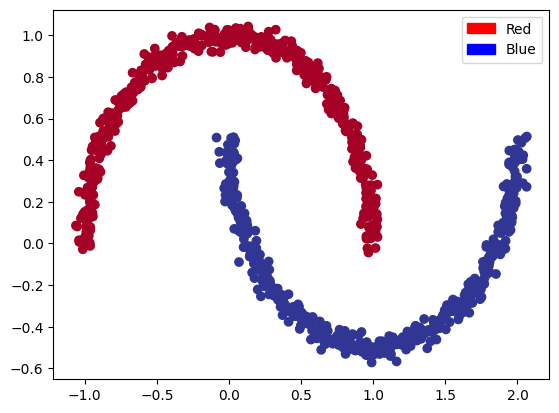

In [8]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
%matplotlib inline

## scatter plot
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)


# create proxy artists for legend
red_patch = mpatches.Patch(color='red', label='Red')
blue_patch = mpatches.Patch(color='blue', label='Blue')

# Add legend using proxy artists
plt.legend(handles=[red_patch, blue_patch], loc='upper right')
plt.show();

In [9]:
import torch
## check version
print(f"Version of Pytorch: {torch.__version__}")

Version of Pytorch: 2.5.1+cu124


In [10]:
## check dtypes of X and y
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [11]:
## y dtype
type(y), y.dtype

(numpy.ndarray, dtype('int64'))

In [12]:
# Turn data into tensors of dtype float from numpy arrays
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

## check dtypes
X.dtype, y.dtype

(torch.float32, torch.float32)

In [26]:
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

## 80/20 train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, ## 80/20 train test split
                                                    random_state=RANDOM_SEED)


In [27]:
## check len of all
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [28]:
## check ndim X
X_test.ndim

2

In [29]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
      super().__init__()
      self.layer_1 = nn.Linear(in_features=in_features, out_features=hidden_units)

      self.layer_2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)

      self.layer_3 = nn.Linear(in_features=hidden_units, out_features=out_features)

      self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# Instantiate the model
model_0 = MoonModelV0(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [30]:
## state dict
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [31]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss() ## binary classification loss function

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(),
                              lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [32]:
# What's coming out of our model?
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [33]:
## Logits (raw outputs of model)
print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

# Prediction probabilities
print("Pred probs:\n\n")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

# Prediction labels
print("Pred labels:\n\n")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([0.0016, 0.0098, 0.0175, 0.0183, 0.0287, 0.0182, 0.0310, 0.0180, 0.0242,
        0.0082], device='cuda:0', grad_fn=<SqueezeBackward0>)
Pred probs:


tensor([0.5004, 0.5025, 0.5044, 0.5046, 0.5072, 0.5046, 0.5077, 0.5045, 0.5060,
        0.5020], device='cuda:0', grad_fn=<SigmoidBackward0>)
Pred labels:


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0',
       grad_fn=<RoundBackward0>)


In [34]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

In [35]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
# !pip -q install torchmetrics # Colab doesn't come with torchmetrics
# from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [36]:
X_train.ndim

2

In [37]:
## set seed
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

# Setup epochs
epochs=1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training Loop
for epoch in range(epochs):
  ### Training mode
  model_0.train()


  # 1. Forward pass (logits output)
  # Turn logits into prediction probabilities
  y_logits = model_0(X_train).squeeze()

  # Turn prediction probabilities into prediction labels
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)


  # 2. Calculate the loss
  loss = loss_fn(y_logits,
                 y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing Loop
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test).squeeze()

    # Turn the test logits into prediction labels -- scale using sigmoid funciton
    test_pred = torch.round(torch.sigmoid(test_logits))


    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred,
                      y_test.int())

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69537 | Acc: 0.38% | Test Loss: 0.69457 | Test acc: 0.50%
Epoch: 100 | Loss: 0.38636 | Acc: 0.82% | Test Loss: 0.40196 | Test acc: 0.77%
Epoch: 200 | Loss: 0.23664 | Acc: 0.89% | Test Loss: 0.23758 | Test acc: 0.90%
Epoch: 300 | Loss: 0.19082 | Acc: 0.91% | Test Loss: 0.18528 | Test acc: 0.93%
Epoch: 400 | Loss: 0.15147 | Acc: 0.94% | Test Loss: 0.14452 | Test acc: 0.94%
Epoch: 500 | Loss: 0.10692 | Acc: 0.96% | Test Loss: 0.09974 | Test acc: 0.98%
Epoch: 600 | Loss: 0.06902 | Acc: 0.99% | Test Loss: 0.06298 | Test acc: 0.99%
Epoch: 700 | Loss: 0.04417 | Acc: 1.00% | Test Loss: 0.03936 | Test acc: 1.00%
Epoch: 800 | Loss: 0.03007 | Acc: 1.00% | Test Loss: 0.02625 | Test acc: 1.00%
Epoch: 900 | Loss: 0.02188 | Acc: 1.00% | Test Loss: 0.01887 | Test acc: 1.00%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [38]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

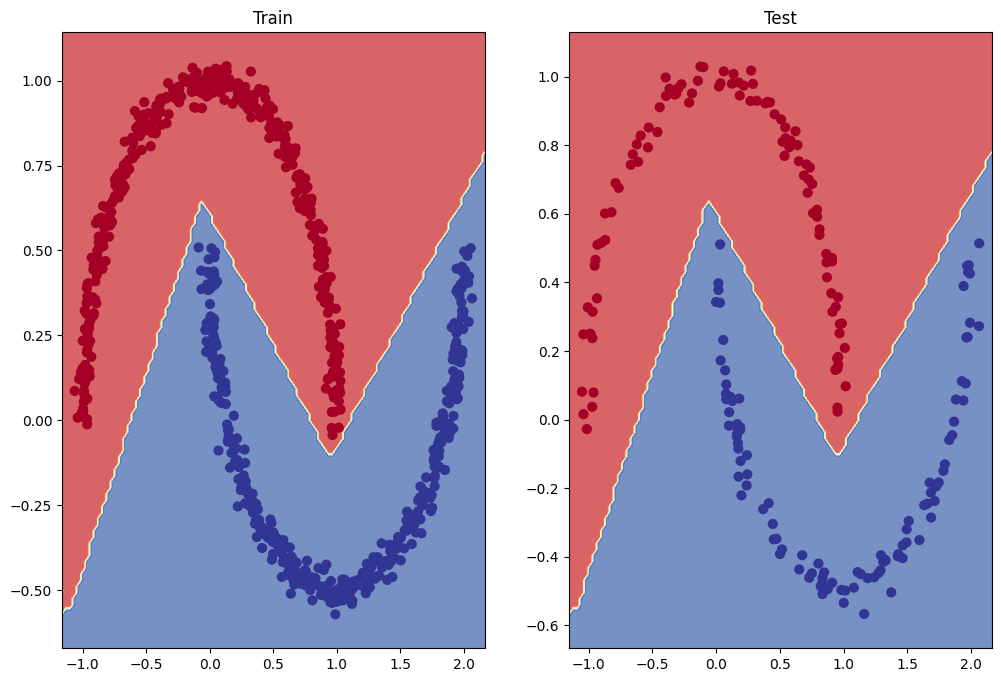

In [39]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

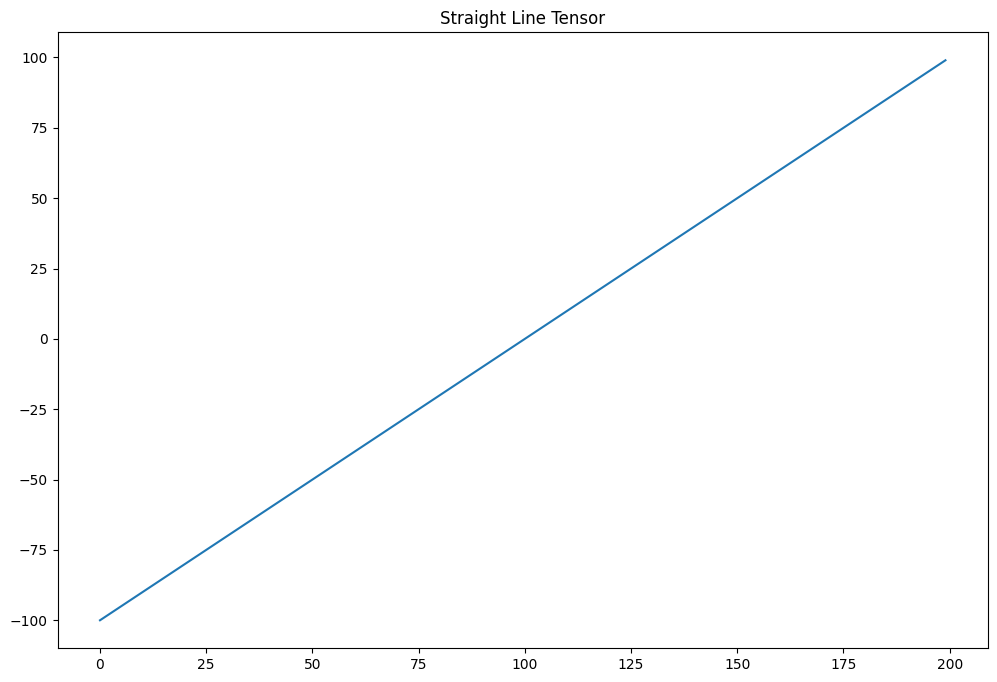

In [43]:
# Create a straight line tensor
tensor_A = torch.arange(-100, 100, 1)
plt.figure(figsize=(12,8))
plt.title("Straight Line Tensor")
plt.plot(tensor_A);

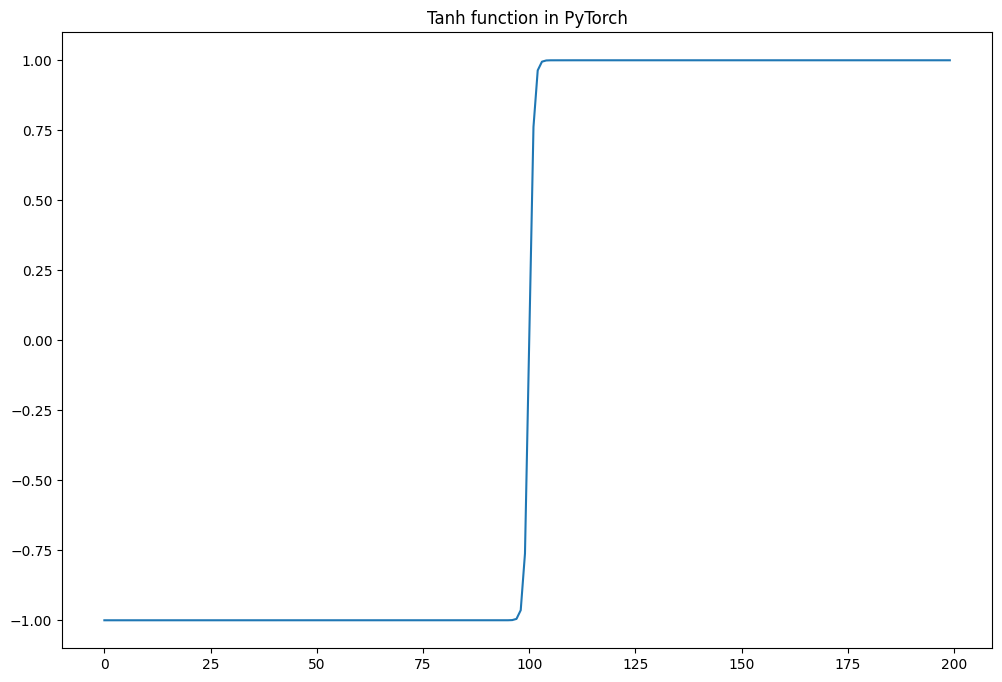

In [44]:
# Test torch.tanh() on the tensor and plot it
plt.figure(figsize=(12,8))
plt.title("Tanh function in PyTorch")
plt.plot(torch.tanh(tensor_A));

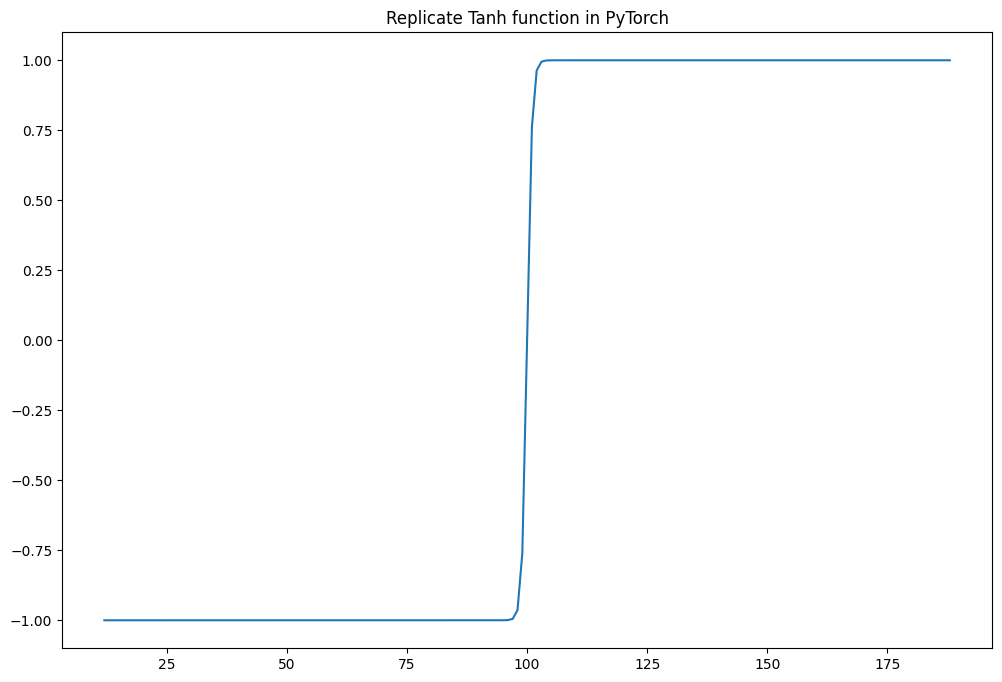

In [45]:
# Replicate torch.tanh() and plot it
def tanh_func(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

## plot function
plt.figure(figsize=(12,8))
plt.title("Replicate Tanh function in PyTorch")
plt.plot(tanh_func(tensor_A));

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

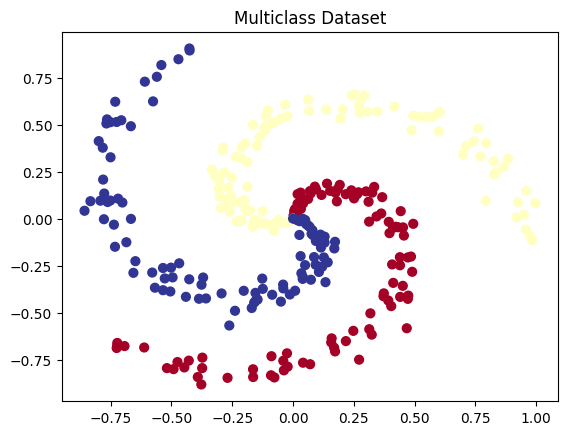

In [47]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.title("Multiclass Dataset")
plt.show()

In [48]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)


## print sizes of train and test
print(f"X_train len: {len(X_train)}")
print(f"X_test len: {len(X_test)}")
print(f"y_train len: {len(y_train)}")
print(f"y_test len: {len(y_test)}")

X_train len: 240
X_test len: 60
y_train len: 240
y_test len: 60


In [49]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [61]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class SpiralModel(nn.Module):
  def __init__(self, in_features, out_features, hidden_units):
    super().__init__()
    self.linear_layer1 = nn.Linear(in_features=in_features, out_features=hidden_units)
    self.linear_layer2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
    self.linear_layer3 = nn.Linear(in_features=hidden_units, out_features=out_features)
    #self.relu = nn.ReLU()
    self.tanh = nn.Tanh()

  # forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer3(self.tanh(self.linear_layer2(self.tanh(self.linear_layer1(x)))))


# Instantiate model and send it to device
model_1 = SpiralModel(in_features=2,
                      out_features=3,
                      hidden_units=10)
model_1.to(device)
model_1

SpiralModel(
  (linear_layer1): Linear(in_features=2, out_features=10, bias=True)
  (linear_layer2): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer3): Linear(in_features=10, out_features=3, bias=True)
  (tanh): Tanh()
)

In [62]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Print out first 10 untrained model outputs (forward pass)
print("Logits:\n\n")
print(model_1(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_1(X_train)[:10], dim=1))

print("Pred labels:")
torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1)

Logits:


tensor([[-0.5194,  0.1303, -0.2217],
        [-0.4768,  0.1843, -0.2096],
        [-0.5060,  0.2063, -0.1725],
        [-0.2914,  0.5125, -0.0309],
        [-0.3460,  0.4782, -0.0373],
        [-0.4459,  0.3103, -0.1254],
        [-0.4687,  0.2764, -0.1398],
        [-0.5850, -0.0259, -0.2676],
        [-0.4279,  0.2886, -0.1533],
        [-0.2884,  0.5166, -0.0288]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.2346, 0.4493, 0.3160],
        [0.2357, 0.4565, 0.3079],
        [0.2255, 0.4597, 0.3148],
        [0.2207, 0.4930, 0.2863],
        [0.2154, 0.4912, 0.2934],
        [0.2218, 0.4725, 0.3056],
        [0.2224, 0.4686, 0.3090],
        [0.2426, 0.4243, 0.3332],
        [0.2292, 0.4692, 0.3016],
        [0.2206, 0.4934, 0.2860]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:


tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')

In [63]:
# Setup loss function and optimizer

## 1. loss function
loss_fn = nn.CrossEntropyLoss()

## 2. optimizer
optimizer = torch.optim.AdamW(params=model_1.parameters(),
                              lr=0.01)

In [64]:
# Build a training loop for the model
torch.manual_seed=42
torch.cuda.manual_seed=42

## epochs
epochs = 1000

# Training Loop over data
for epoch in range(epochs):

  ## Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)


  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)


  # 3. Optimizer zero grad
  optimizer.zero_grad()


  # 4. Loss backward --> backpropagation
  loss.backward()


  # 5. Optimizer step
  optimizer.step()



  ## Testing Loop
  model_1.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch {epoch} | Loss: {loss:.2f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.2f} | Test acc: {test_acc:.2f}%")

Epoch 0 | Loss: 1.10 | Acc: 0.35% | Test Loss: 1.11 | Test acc: 0.27%
Epoch 100 | Loss: 0.43 | Acc: 0.83% | Test Loss: 0.39 | Test acc: 0.88%
Epoch 200 | Loss: 0.12 | Acc: 0.98% | Test Loss: 0.08 | Test acc: 1.00%
Epoch 300 | Loss: 0.07 | Acc: 0.98% | Test Loss: 0.04 | Test acc: 1.00%
Epoch 400 | Loss: 0.05 | Acc: 0.99% | Test Loss: 0.02 | Test acc: 1.00%
Epoch 500 | Loss: 0.04 | Acc: 0.99% | Test Loss: 0.01 | Test acc: 1.00%
Epoch 600 | Loss: 0.03 | Acc: 0.99% | Test Loss: 0.01 | Test acc: 1.00%
Epoch 700 | Loss: 0.03 | Acc: 0.99% | Test Loss: 0.01 | Test acc: 1.00%
Epoch 800 | Loss: 0.03 | Acc: 0.99% | Test Loss: 0.00 | Test acc: 1.00%
Epoch 900 | Loss: 0.02 | Acc: 0.99% | Test Loss: 0.00 | Test acc: 1.00%


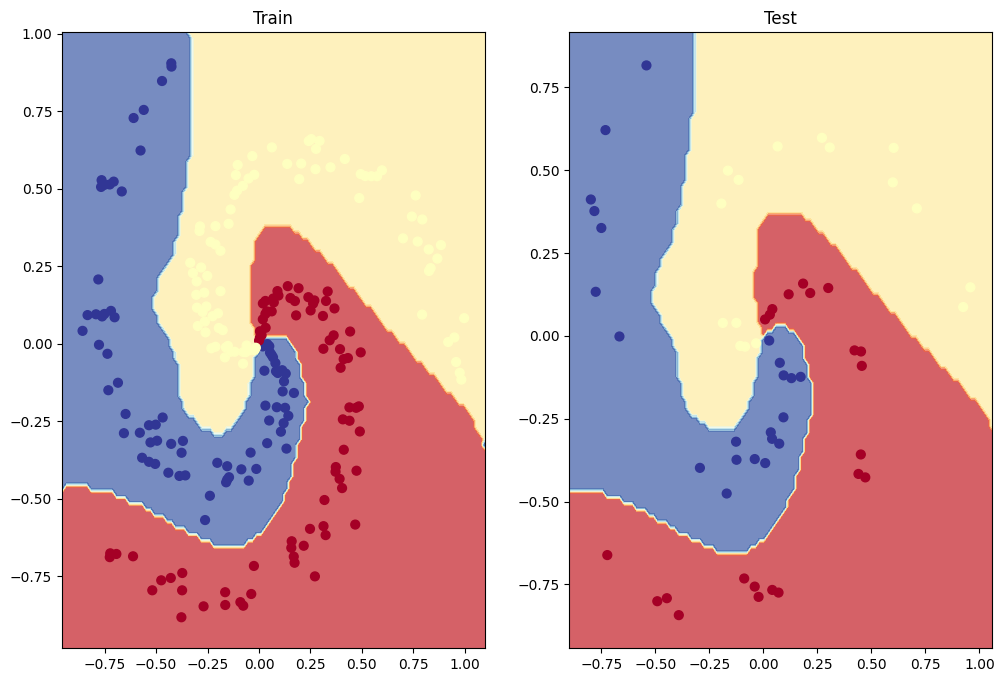

In [65]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Summary
* Comparing the results of Tanh vs. ReLU non-linear functions, there isn't much difference, the results are virtually the same. Granted this is a "toy dataset".